In [1]:
from fastai.vision import *

In [2]:
test_results = Path("test_results/")

In [3]:
test_results.ls()

[PosixPath('test_results/tl_brain_ct_models'),
 PosixPath('test_results/notl_ventricle_mr_models'),
 PosixPath('test_results/notl_brain_ct_models'),
 PosixPath('test_results/tl_ventricle_ct_models'),
 PosixPath('test_results/notl_brain_mr_models'),
 PosixPath('test_results/tl_ventricle_mr_models'),
 PosixPath('test_results/tl_brain_mr_models'),
 PosixPath('test_results/notl_ventricle_ct_models')]

In [15]:
experiment_results = [o for o in list(test_results.glob('**/*')) if '.txt' == o.suffix]

In [21]:
experiments_dict = defaultdict(list)
for o in experiment_results: experiments_dict[o.parent.name].append(o)

In [25]:
sorted(list(experiments_dict.keys()))

['NOTL_Brain_CT_Baseline_11',
 'NOTL_Brain_MR_Baseline_11',
 'NOTL_Ventricle_CT_Baseline_11',
 'NOTL_Ventricle_CT_Baseline_11_10_SAMPLES',
 'NOTL_Ventricle_CT_Baseline_11_20_SAMPLES',
 'NOTL_Ventricle_CT_Baseline_11_40_SAMPLES',
 'NOTL_Ventricle_CT_Baseline_11_5_SAMPLES',
 'NOTL_Ventricle_CT_Baseline_11_60_SAMPLES',
 'NOTL_Ventricle_MR_Baseline_11',
 'NOTL_Ventricle_MR_Baseline_11_10_SAMPLES',
 'NOTL_Ventricle_MR_Baseline_11_20_SAMPLES',
 'NOTL_Ventricle_MR_Baseline_11_40_SAMPLES',
 'NOTL_Ventricle_MR_Baseline_11_5_SAMPLES',
 'NOTL_Ventricle_MR_Baseline_11_60_SAMPLES',
 'NOTL_Ventricle_MR_Baseline_9',
 'NOTL_Ventricle_MR_Baseline_9_10_SAMPLES',
 'NOTL_Ventricle_MR_Baseline_9_20_SAMPLES',
 'NOTL_Ventricle_MR_Baseline_9_40_SAMPLES',
 'NOTL_Ventricle_MR_Baseline_9_5_SAMPLES',
 'NOTL_Ventricle_MR_Baseline_9_60_SAMPLES',
 'TL_Brain_CT_Baseline_11',
 'TL_Brain_MR_Baseline_11',
 'TL_Ventricle_CT_Baseline_11',
 'TL_Ventricle_CT_Baseline_11_10_SAMPLES',
 'TL_Ventricle_CT_Baseline_11_20_SAMPLES'

In [33]:
experiments_results = {}
for k in experiments_dict:
    experiments_results[k] = np.array([eval(open(o).read()) for o in experiments_dict[k]])

In [35]:
experiments_results

{'TL_Brain_CT_Baseline_11': array([[0.983335, 0.97831 ],
        [0.983416, 0.978513],
        [0.983253, 0.978467],
        [0.983186, 0.978398],
        [0.983188, 0.97836 ],
        [0.983313, 0.977213],
        [0.982724, 0.977315],
        [0.98291 , 0.97695 ]]),
 'NOTL_Ventricle_MR_Baseline_11_60_SAMPLES': array([[0.755015, 0.724742],
        [0.763938, 0.764051],
        [0.762155, 0.750656],
        [0.785663, 0.768776],
        [0.750438, 0.710539],
        [0.773945, 0.7535  ],
        [0.782936, 0.764164],
        [0.75816 , 0.737883],
        [0.734711, 0.733661],
        [0.759548, 0.750856]]),
 'NOTL_Ventricle_MR_Baseline_9': array([[0.808653, 0.748736],
        [0.868283, 0.8299  ],
        [0.868252, 0.830862],
        [0.866627, 0.824368],
        [0.857603, 0.811089],
        [0.868912, 0.830071],
        [0.867595, 0.824149],
        [0.854312, 0.805435],
        [0.864387, 0.830658],
        [0.843747, 0.805955]]),
 'NOTL_Ventricle_MR_Baseline_9_10_SAMPLES': array([

### tests

In [226]:
from scipy.stats import * 

In [330]:
rv1 = experiments_results['TL_Ventricle_MR_Baseline_9']

In [329]:
rv2 = experiments_results['TL_Ventricle_CT_Baseline_11']

In [323]:
i = 1

In [324]:
rv1[:,i], rv1[:,i].mean()

(array([0.830256, 0.821158, 0.821222, 0.82114 , 0.829475, 0.829162, 0.830147, 0.828038, 0.820826, 0.821111]),
 0.8252537250518799)

In [325]:
rv2[:,i], rv2[:,i].mean()

(array([0.819606, 0.821438, 0.81131 , 0.806604, 0.814643, 0.816593, 0.8165  , 0.812603, 0.816066, 0.808912]),
 0.8144274711608886)

In [326]:
res = ttest_ind(rv1[:, i], rv2[:, i], equal_var=False)

In [327]:
res.pvalue / 2

2.214508707370844e-05

### plots

In [46]:
experiments_mean_std = {}
for o in experiments_results:
    m=experiments_results[o].mean(axis=0)
    s=experiments_results[o].std(axis=0)
    experiments_mean_std[o] = np.stack([m,s]).reshape(-1,)

In [94]:
df = pd.DataFrame(experiments_mean_std, index=["test1_mean", "test2_mean", "test1_std", "test2_std"]).T

In [95]:
df['mode'] = np.array(pd.Series(df.index).apply(lambda x: x.split("_")[0]))
df['task'] = np.array(pd.Series(df.index).apply(lambda x: x.split("_")[1]))
df['modality'] = np.array(pd.Series(df.index).apply(lambda x: x.split("_")[2]))
df['model'] = np.array(pd.Series(df.index).apply(lambda x: "_".join(x.split("_")[3:5])))
df['sample'] = np.array(pd.Series(df.index).apply(lambda x: "_".join(x.split("_")[5:6])))

In [96]:
# df.to_csv('experiments.csv', index=True)
# from IPython.display import FileLink
# FileLink("experiments.csv")

In [126]:
df['sample'] = df['sample'].apply(lambda x: np.nan if x == '' else int(x))

In [138]:
df.loc[df.modality == 'MR', 'sample'] = df[df.modality == 'MR']['sample'].fillna(112)
df.loc[df.modality == 'CT', 'sample'] = df[df.modality == 'CT']['sample'].fillna(107)

In [152]:
# mr 
mr_brain = (df[(df.task == 'Brain') 
    & (df.modality == 'MR')]
.sort_values(['sample', 'mode']))
mr_brain

,test1_mean,test2_mean,test1_std,test2_std,mode,task,modality,model,sample
NOTL_Brain_MR_Baseline_11,0.960572,0.944238,0.005023,0.008269,NOTL,Brain,MR,Baseline_11,112.0
TL_Brain_MR_Baseline_11,0.973427,0.964401,0.000157,0.000430,TL,Brain,MR,Baseline_11,112.0


In [153]:
# ct
ct_brain = (df[(df.task == 'Brain') 
    & (df.modality == 'CT')]
.sort_values(['sample', 'mode']))
ct_brain

,test1_mean,test2_mean,test1_std,test2_std,mode,task,modality,model,sample
NOTL_Brain_CT_Baseline_11,0.978403,0.971611,0.001254,0.001815,NOTL,Brain,CT,Baseline_11,107.0
TL_Brain_CT_Baseline_11,0.983166,0.977941,0.000218,0.000615,TL,Brain,CT,Baseline_11,107.0


In [155]:
# mr 9
mr_ventricle_9 = (df[(df.task == 'Ventricle') 
    & (df.model == 'Baseline_9')
    & (df.modality == 'MR')]
.sort_values(['sample', 'mode']))
mr_ventricle_9

,test1_mean,test2_mean,test1_std,test2_std,mode,task,modality,model,sample
NOTL_Ventricle_MR_Baseline_9_5_SAMPLES,0.436227,0.574517,0.158248,0.067786,NOTL,Ventricle,MR,Baseline_9,5.0
TL_Ventricle_MR_Baseline_9_5_SAMPLES,0.846742,0.783556,0.001848,0.012740,TL,Ventricle,MR,Baseline_9,5.0
NOTL_Ventricle_MR_Baseline_9_10_SAMPLES,0.543349,0.520429,0.034352,0.128613,NOTL,Ventricle,MR,Baseline_9,10.0
TL_Ventricle_MR_Baseline_9_10_SAMPLES,0.853533,0.791553,0.002026,0.009955,TL,Ventricle,MR,Baseline_9,10.0
NOTL_Ventricle_MR_Baseline_9_20_SAMPLES,0.643696,0.609076,0.155792,0.139735,NOTL,Ventricle,MR,Baseline_9,20.0
TL_Ventricle_MR_Baseline_9_20_SAMPLES,0.859905,0.799678,0.001230,0.006587,TL,Ventricle,MR,Baseline_9,20.0
NOTL_Ventricle_MR_Baseline_9_40_SAMPLES,0.805139,0.783784,0.077050,0.033184,NOTL,Ventricle,MR,Baseline_9,40.0
TL_Ventricle_MR_Baseline_9_40_SAMPLES,0.862896,0.812946,0.001652,0.006818,TL,Ventricle,MR,Baseline_9,40.0
NOTL_Ventricle_MR_Baseline_9_60_SAMPLES,0.839146,0.803748,0.027549,0.035475,NOTL,Ventricle,MR,Baseline_9,60.0
TL_Ventricle_MR_Baseline_9_60_SAMPLES,0.865027,0.817692,0.001259,0.005424,TL,Ventricle,MR,Baseline_9,60.0


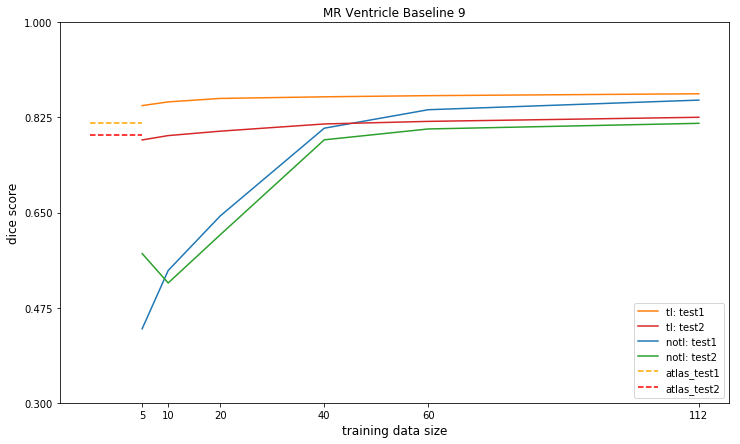

In [220]:
# test1_atlas, test2_atlas = (0.8149, 0.7933)
df = mr_ventricle_9

data1 = df[df['mode'] == 'NOTL']
data2 = df[df['mode'] == 'TL']
fig,ax=plt.subplots(1,1,figsize=(12,7))

atlas_test1 = ax.hlines(0.8149,-5,5,linestyles='dashed',colors='orange')
atlas_test2 = ax.hlines(0.7933,-5,5,linestyles='dashed',colors='red')

notl_test1 = ax.plot(data1['sample'], data1['test1_mean'])
tl_test1 = ax.plot(data2['sample'], data2['test1_mean'])
notl_test2 = ax.plot(data1['sample'], data1['test2_mean'])
tl_test2 = ax.plot(data2['sample'], data2['test2_mean'])


ax.set_ylabel('dice score', fontdict=dict([('fontsize', 12)]))
ax.set_xlabel('training data size', fontdict=dict([('fontsize', 12)]))

ax.set_yticks(np.linspace(0.3,1,5))
ax.set_xticks(data2['sample'])

ax.set_title("MR Ventricle Baseline 9");
ax.legend(( tl_test1[0], tl_test2[0], notl_test1[0], notl_test2[0], atlas_test1, atlas_test2),
          ('tl: test1', 'tl: test2', 'notl: test1', 'notl: test2', 'atlas_test1', 'atlas_test2'),
          loc='lower right');

In [156]:
# mr 11
mr_ventricle_11 = (df[(df.task == 'Ventricle') 
    & (df.model == 'Baseline_11')
    & (df.modality == 'MR')]
.sort_values(['sample', 'mode']))
mr_ventricle_11

,test1_mean,test2_mean,test1_std,test2_std,mode,task,modality,model,sample
NOTL_Ventricle_MR_Baseline_11_5_SAMPLES,0.052213,0.131485,0.003995,0.010388,NOTL,Ventricle,MR,Baseline_11,5.0
TL_Ventricle_MR_Baseline_11_5_SAMPLES,0.844265,0.771096,0.002901,0.011084,TL,Ventricle,MR,Baseline_11,5.0
NOTL_Ventricle_MR_Baseline_11_10_SAMPLES,0.101383,0.244060,0.024930,0.059083,NOTL,Ventricle,MR,Baseline_11,10.0
TL_Ventricle_MR_Baseline_11_10_SAMPLES,0.849257,0.779248,0.002143,0.007849,TL,Ventricle,MR,Baseline_11,10.0
NOTL_Ventricle_MR_Baseline_11_20_SAMPLES,0.261970,0.460528,0.071404,0.111680,NOTL,Ventricle,MR,Baseline_11,20.0
TL_Ventricle_MR_Baseline_11_20_SAMPLES,0.856007,0.794961,0.001590,0.006915,TL,Ventricle,MR,Baseline_11,20.0
NOTL_Ventricle_MR_Baseline_11_40_SAMPLES,0.598343,0.697973,0.033343,0.014374,NOTL,Ventricle,MR,Baseline_11,40.0
TL_Ventricle_MR_Baseline_11_40_SAMPLES,0.859597,0.802416,0.001563,0.005781,TL,Ventricle,MR,Baseline_11,40.0
NOTL_Ventricle_MR_Baseline_11_60_SAMPLES,0.762651,0.745883,0.014451,0.017898,NOTL,Ventricle,MR,Baseline_11,60.0
TL_Ventricle_MR_Baseline_11_60_SAMPLES,0.862111,0.803042,0.001855,0.007170,TL,Ventricle,MR,Baseline_11,60.0


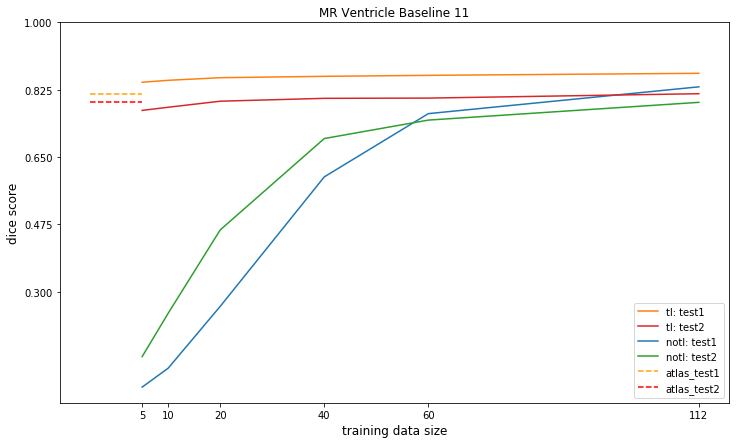

In [221]:
# test1_atlas, test2_atlas = (0.8149, 0.7933)
df = mr_ventricle_11

data1 = df[df['mode'] == 'NOTL']
data2 = df[df['mode'] == 'TL']
fig,ax=plt.subplots(1,1,figsize=(12,7))

atlas_test1 = ax.hlines(0.8149,-5,5,linestyles='dashed',colors='orange')
atlas_test2 = ax.hlines(0.7933,-5,5,linestyles='dashed',colors='red')

notl_test1 = ax.plot(data1['sample'], data1['test1_mean'])
tl_test1 = ax.plot(data2['sample'], data2['test1_mean'])
notl_test2 = ax.plot(data1['sample'], data1['test2_mean'])
tl_test2 = ax.plot(data2['sample'], data2['test2_mean'])


ax.set_ylabel('dice score', fontdict=dict([('fontsize', 12)]))
ax.set_xlabel('training data size', fontdict=dict([('fontsize', 12)]))

ax.set_yticks(np.linspace(0.3,1,5))
ax.set_xticks(data2['sample'])

ax.set_title("MR Ventricle Baseline 11");
ax.legend(( tl_test1[0], tl_test2[0], notl_test1[0], notl_test2[0], atlas_test1, atlas_test2),
          ('tl: test1', 'tl: test2', 'notl: test1', 'notl: test2', 'atlas_test1', 'atlas_test2'),
          loc='lower right');

In [157]:
# ct 11
ct_ventricle_11 = (df[(df.task == 'Ventricle') 
    & (df.model == 'Baseline_11')
    & (df.modality == 'CT')]
.sort_values(['sample', 'mode']))
ct_ventricle_11

,test1_mean,test2_mean,test1_std,test2_std,mode,task,modality,model,sample
NOTL_Ventricle_CT_Baseline_11_5_SAMPLES,0.083634,0.147204,0.009691,0.015481,NOTL,Ventricle,CT,Baseline_11,5.0
TL_Ventricle_CT_Baseline_11_5_SAMPLES,0.764810,0.680461,0.005977,0.018205,TL,Ventricle,CT,Baseline_11,5.0
NOTL_Ventricle_CT_Baseline_11_10_SAMPLES,0.136097,0.226135,0.021660,0.031397,NOTL,Ventricle,CT,Baseline_11,10.0
TL_Ventricle_CT_Baseline_11_10_SAMPLES,0.790682,0.711582,0.005405,0.013294,TL,Ventricle,CT,Baseline_11,10.0
NOTL_Ventricle_CT_Baseline_11_20_SAMPLES,0.285853,0.430064,0.075607,0.099606,NOTL,Ventricle,CT,Baseline_11,20.0
TL_Ventricle_CT_Baseline_11_20_SAMPLES,0.803887,0.734829,0.006166,0.008913,TL,Ventricle,CT,Baseline_11,20.0
NOTL_Ventricle_CT_Baseline_11_40_SAMPLES,0.512577,0.603366,0.123916,0.116998,NOTL,Ventricle,CT,Baseline_11,40.0
TL_Ventricle_CT_Baseline_11_40_SAMPLES,0.811895,0.746284,0.003371,0.009788,TL,Ventricle,CT,Baseline_11,40.0
NOTL_Ventricle_CT_Baseline_11_60_SAMPLES,0.642045,0.648165,0.137569,0.094393,NOTL,Ventricle,CT,Baseline_11,60.0
TL_Ventricle_CT_Baseline_11_60_SAMPLES,0.817706,0.754887,0.003210,0.006114,TL,Ventricle,CT,Baseline_11,60.0


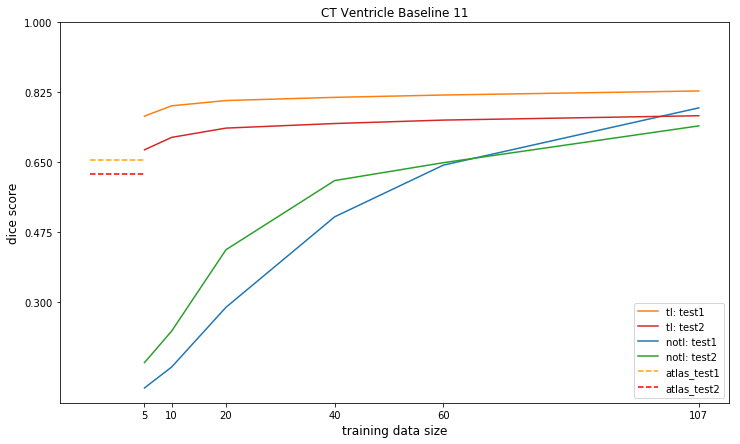

In [223]:
# test1_atlas, test2_atlas = (0.6548, 0.6188)
df = ct_ventricle_11

data1 = df[df['mode'] == 'NOTL']
data2 = df[df['mode'] == 'TL']
fig,ax=plt.subplots(1,1,figsize=(12,7))

atlas_test1 = ax.hlines(0.6548,-5,5,linestyles='dashed',colors='orange')
atlas_test2 = ax.hlines(0.6188,-5,5,linestyles='dashed',colors='red')

notl_test1 = ax.plot(data1['sample'], data1['test1_mean'])
tl_test1 = ax.plot(data2['sample'], data2['test1_mean'])
notl_test2 = ax.plot(data1['sample'], data1['test2_mean'])
tl_test2 = ax.plot(data2['sample'], data2['test2_mean'])


ax.set_ylabel('dice score', fontdict=dict([('fontsize', 12)]))
ax.set_xlabel('training data size', fontdict=dict([('fontsize', 12)]))

ax.set_yticks(np.linspace(0.3,1,5))
ax.set_xticks(data2['sample'])

ax.set_title("CT Ventricle Baseline 11");
ax.legend(( tl_test1[0], tl_test2[0], notl_test1[0], notl_test2[0], atlas_test1, atlas_test2),
          ('tl: test1', 'tl: test2', 'notl: test1', 'notl: test2', 'atlas_test1', 'atlas_test2'),
          loc='lower right');
